## Block Neural Autoregressive Flow
Block neural autoregressive flows are useful for training a density estimator, when sampling is not required.

In [1]:
from jax import random
import jax.numpy as jnp
from flowjax.flows import BlockNeuralAutoregressiveFlow
from flowjax.train_utils import train_flow 
import matplotlib.pyplot as plt
key = random.PRNGKey(0)


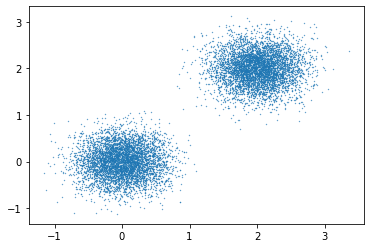

In [2]:
n = 10000
key, subkey = random.split(key)
x = random.normal(subkey, (n, 2))/3
x = x.at[n//2:].set(x[n//2:] + 2)
plt.scatter(x[:, 0], x[:, 1], s=0.1)

In [6]:
key, subkey = random.split(key)
flow = BlockNeuralAutoregressiveFlow(key, 2, block_size=(8,8))
key, subkey = random.split(key)
flow, _ = train_flow(subkey, flow, x, learning_rate=0.008, max_epochs=200, max_patience=30)

 60%|█████▉    | 119/200 [00:52<00:35,  2.27it/s, train=1.37, val=1.37]

Max patience reached.


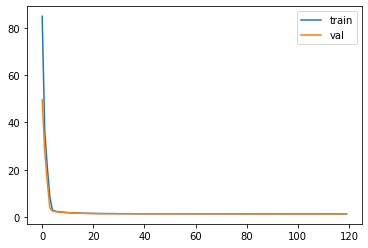

In [9]:
for k, v in _.items():
    plt.plot(v, label=k)
plt.legend()
plt.show()

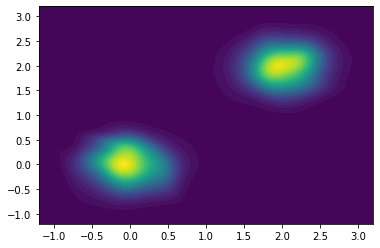

In [12]:
resolution = 200
xline = jnp.linspace(-1.2, 3.2, resolution)
yline = jnp.linspace(-1.2, 3.2, resolution)
xgrid, ygrid = jnp.meshgrid(xline, yline)
xyinput = jnp.column_stack((xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)))
zgrid = jnp.exp(flow.log_prob(xyinput).reshape(resolution, resolution))

import numpy as onp
grids = [onp.array(g) for g in [xgrid, ygrid, zgrid]]
plt.contourf(*grids, levels=40)
plt.show()

